In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [479]:
df=pd.read_csv('data2.csv')

In [480]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [481]:
df.isnull().mean()

age               0.0
workclass         0.0
fnlwgt            0.0
education         0.0
education.num     0.0
marital.status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital.gain      0.0
capital.loss      0.0
hours.per.week    0.0
native.country    0.0
income            0.0
dtype: float64

In [482]:
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [483]:
df['workclass'].value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

This value counts shows us that worlclass has ? values which does not tell us any information.
Therefore we will replace it by more frequent value which is Private

In [484]:
df['workclass']=df['workclass'].replace(to_replace='?',value='Private')

In [485]:
df['workclass'].value_counts()

workclass
Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

<Axes: ylabel='age'>

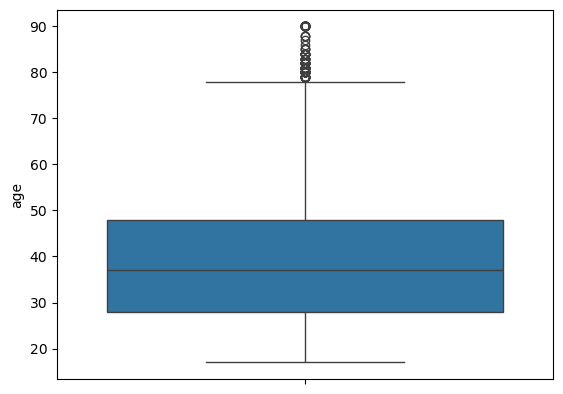

In [486]:
sns.boxplot(df['age'])

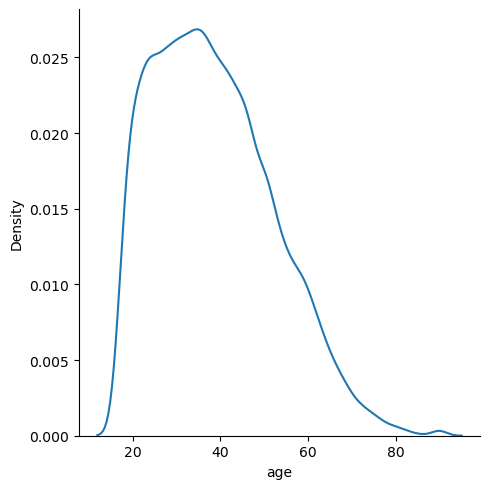

In [487]:
sns.displot(df['age'],kind='kde')

In [488]:
percent25=df['age'].quantile(0.25)
percent75=df['age'].quantile(0.75)

In [489]:
iqr=percent75-percent25


In [490]:
upper_limit=percent75+1.5*iqr
lower_limit=percent25-1.5*iqr

In [491]:
print("Upper limit:",upper_limit)
print("Lower limit:",lower_limit)

Upper limit: 78.0
Lower limit: -2.0


In [492]:
df['age']=np.where(
    df['age']>upper_limit,
    upper_limit,
    np.where(
        df['age']<lower_limit,
        lower_limit,
        df['age']
    )
)

<Axes: ylabel='age'>

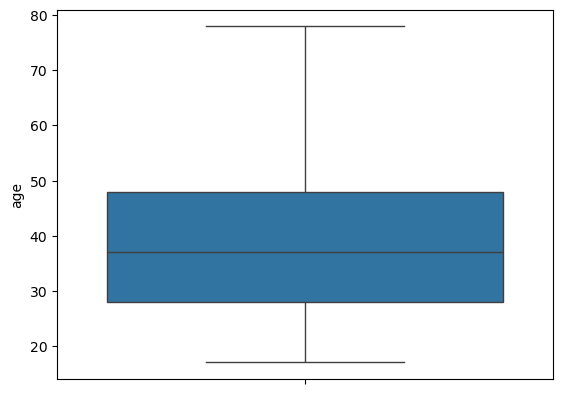

In [493]:
sns.boxplot(df['age'])

With this help of quantile range,we replaced all the outliers with their respective upper and lower limits/bounds

In [494]:
df['education.num'].value_counts()

education.num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: count, dtype: int64

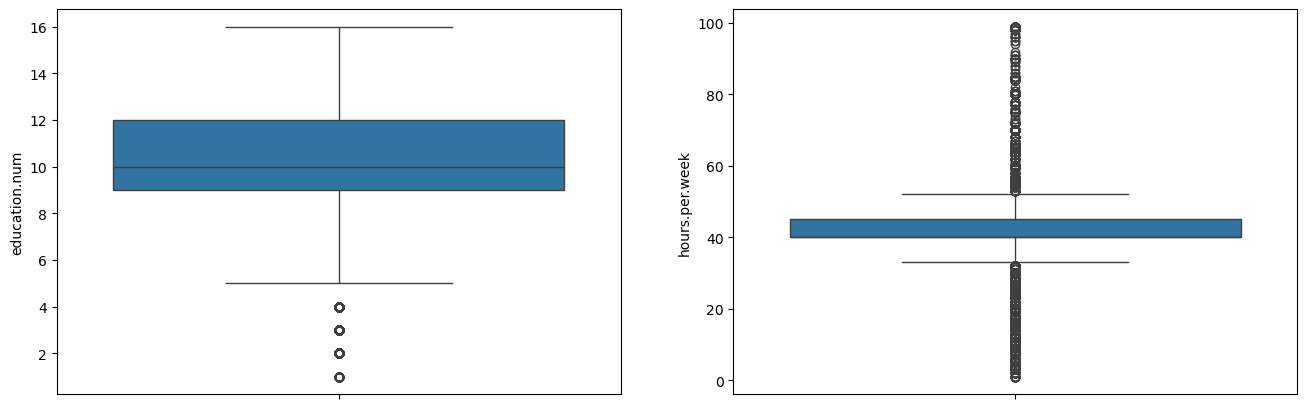

In [495]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.boxplot(df['education.num'])

plt.subplot(1,2,2)

sns.boxplot(df['hours.per.week'])
plt.show()

In [496]:
df['education.num'].skew()

-0.31167586791022966

In [497]:
df['education.num'].value_counts()
upper=df['education.num'].mean()+3*df['education.num'].std()
lower=df['education.num'].mean()-3*df['education.num'].std()


In [498]:
df['education.num']=np.where(
    df['education.num']>upper,
    upper,
    np.where(
        df['education.num']<lower,
        lower,
        df['education.num']
    )
)

In [499]:
df['education.num'].describe()

count    32561.000000
mean        10.084684
std          2.559975
min          2.362518
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education.num, dtype: float64

<Axes: ylabel='education.num'>

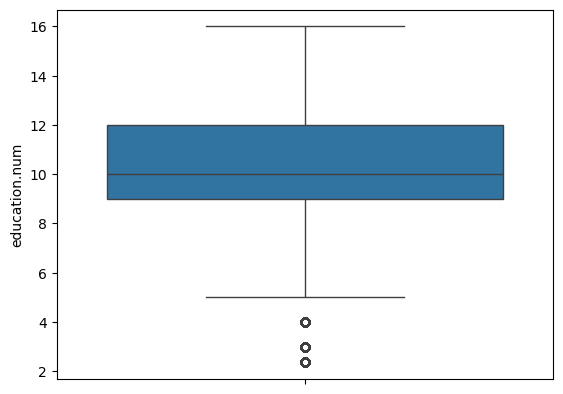

In [500]:
sns.boxplot(df['education.num'])

In [501]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053,HS-grad,9.0,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,78.0,Private,132870,HS-grad,9.0,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66.0,Private,186061,Some-college,10.0,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54.0,Private,140359,7th-8th,4.0,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41.0,Private,264663,Some-college,10.0,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [502]:
df=df.drop(['marital.status','relationship','race','sex'],axis=1)

In [503]:
df.shape

(32561, 11)

In [504]:
df.head()

,age,workclass,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053,HS-grad,9.0,?,0,4356,40,United-States,<=50K
1,78.0,Private,132870,HS-grad,9.0,Exec-managerial,0,4356,18,United-States,<=50K
2,66.0,Private,186061,Some-college,10.0,?,0,4356,40,United-States,<=50K
3,54.0,Private,140359,7th-8th,4.0,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41.0,Private,264663,Some-college,10.0,Prof-specialty,0,3900,40,United-States,<=50K


In [505]:
df['occupation'].value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

In [506]:
df['occupation']=df['occupation'].replace(to_replace='?',value='Prof-specialty')

In [507]:
df.head(10)

,age,workclass,fnlwgt,education,education.num,occupation,capital.gain,capital.loss,hours.per.week,native.country,income
0,78.0,Private,77053,HS-grad,9.0,Prof-specialty,0,4356,40,United-States,<=50K
1,78.0,Private,132870,HS-grad,9.0,Exec-managerial,0,4356,18,United-States,<=50K
2,66.0,Private,186061,Some-college,10.0,Prof-specialty,0,4356,40,United-States,<=50K
3,54.0,Private,140359,7th-8th,4.0,Machine-op-inspct,0,3900,40,United-States,<=50K
4,41.0,Private,264663,Some-college,10.0,Prof-specialty,0,3900,40,United-States,<=50K
5,34.0,Private,216864,HS-grad,9.0,Other-service,0,3770,45,United-States,<=50K
6,38.0,Private,150601,10th,6.0,Adm-clerical,0,3770,40,United-States,<=50K
7,74.0,State-gov,88638,Doctorate,16.0,Prof-specialty,0,3683,20,United-States,>50K
8,68.0,Federal-gov,422013,HS-grad,9.0,Prof-specialty,0,3683,40,United-States,<=50K
9,41.0,Private,70037,Some-college,10.0,Craft-repair,0,3004,60,?,>50K


In [508]:
# df['income']=df['income'].replace(to_replace='<=50K',value=0)
# df['income']=df['income'].replace(to_replace='>50K',value=1)


In [509]:
df['native.country']=df['native.country'].replace(to_replace='?',value='United-States ')

In [510]:
df=df.drop(['native.country'],axis=1)

In [511]:
df=pd.get_dummies(df,columns=['workclass','education','occupation','income'],drop_first=True,dtype=int)

In [512]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,...,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,income_>50K
0,78.0,77053,9.0,0,4356,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,78.0,132870,9.0,0,4356,18,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,66.0,186061,10.0,0,4356,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
3,54.0,140359,4.0,0,3900,40,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
4,41.0,264663,10.0,0,3900,40,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0


In [513]:
df['fnlwgt'].skew()

1.4469800945789828

In [514]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [515]:
X=df.drop(['income_>50K'],axis=1)
y=df['income_>50K']

In [516]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [517]:
# from sklearn.preprocessing import StandardScaler
# scaler=StandardScaler()

# scaler.fit(X_train)
# X_train_scaled=scaler.transform(X_tarin)
# X_test_scaled=scaler.transform(X_test)

In [518]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [519]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred_regg=clf.predict(X_test)
y_pred_tree=clf2.predict(X_test)

print("Accuracy using LogisticRegression",accuracy_score(y_test,y_pred_regg))
print("Accuracy using DecisionTreeClassifier",accuracy_score(y_test,y_pred_tree))

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy using LogisticRegression 0.7980961154613849
Accuracy using DecisionTreeClassifier 0.7836634423460771


In [527]:
print("LR",np.mean(cross_val_score(clf,X_test,y_test,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_test,y_test,scoring='accuracy',cv=10)))

C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vivek\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR 0.7976357750699726
DT 0.7716856087378549
